In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
activity=pd.read_csv('dailyActivity_merged.csv')
calories=pd.read_csv('dailyCalories_merged.csv')
intensity=pd.read_csv('dailyIntensities_merged.csv')
sleepday=pd.read_csv('sleepDay_merged.csv')
weightlog=pd.read_csv('weightLogInfo_merged.csv')

In [3]:
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'])
calories['ActivityDay'] = pd.to_datetime(calories['ActivityDay'])
intensity['ActivityDay'] = pd.to_datetime(intensity['ActivityDay'])
sleepday['SleepDay'] = pd.to_datetime(sleepday['SleepDay'])
weightlog['Date'] = pd.to_datetime(weightlog['Date'])

C:\Users\HP\AppData\Local\Temp\ipykernel_16856\4029387411.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleepday['SleepDay'] = pd.to_datetime(sleepday['SleepDay'])
C:\Users\HP\AppData\Local\Temp\ipykernel_16856\4029387411.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weightlog['Date'] = pd.to_datetime(weightlog['Date'])


In [4]:
activity = activity.drop_duplicates()
calories = calories.drop_duplicates()
intensity = intensity.drop_duplicates()
sleepday = sleepday.drop_duplicates()
weightlog = weightlog.drop_duplicates()

In [5]:
print(activity.duplicated().sum())
print(calories.duplicated().sum())
print(intensity.duplicated().sum())
print(weightlog.duplicated().sum())
print(sleepday.duplicated().sum())

0
0
0
0
0


In [6]:
activity.rename(columns={'ActivityDate': 'Date'}, inplace=True)
calories.rename(columns={'ActivityDay': 'Date'}, inplace=True)
intensity.rename(columns={'ActivityDay': 'Date'}, inplace=True)
sleepday.rename(columns={'SleepDay': 'Date'}, inplace=True)

In [7]:
activity.isnull().sum()

Id                          0
Date                        0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [8]:
calories.isnull().sum()

Id          0
Date        0
Calories    0
dtype: int64

In [9]:
intensity.isnull().sum()

Id                          0
Date                        0
SedentaryMinutes            0
LightlyActiveMinutes        0
FairlyActiveMinutes         0
VeryActiveMinutes           0
SedentaryActiveDistance     0
LightActiveDistance         0
ModeratelyActiveDistance    0
VeryActiveDistance          0
dtype: int64

In [10]:
intensity.isnull().sum()

Id                          0
Date                        0
SedentaryMinutes            0
LightlyActiveMinutes        0
FairlyActiveMinutes         0
VeryActiveMinutes           0
SedentaryActiveDistance     0
LightActiveDistance         0
ModeratelyActiveDistance    0
VeryActiveDistance          0
dtype: int64

In [11]:
sleepday.isnull().sum()

Id                    0
Date                  0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [12]:
weightlog.isnull().sum()  # have missing value in Fat

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

In [13]:
weightlog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              67 non-null     int64         
 1   Date            67 non-null     datetime64[ns]
 2   WeightKg        67 non-null     float64       
 3   WeightPounds    67 non-null     float64       
 4   Fat             2 non-null      float64       
 5   BMI             67 non-null     float64       
 6   IsManualReport  67 non-null     bool          
 7   LogId           67 non-null     int64         
dtypes: bool(1), datetime64[ns](1), float64(4), int64(2)
memory usage: 3.9 KB


In [14]:
weightlog.drop(columns=['Fat'],inplace=True) #dropping fat column because it have a lot of missing values

In [15]:
df = activity.copy()

# Merge with calories
df = pd.merge(df, calories, on=['Id', 'Date'], how='left')

# Merge with intensities
df = pd.merge(df, intensity, on=['Id', 'Date'], how='left')

# Merge with sleep
df = pd.merge(df, sleepday, on=['Id', 'Date'], how='left')

# Merge with weight
df = pd.merge(df, weightlog, on=['Id', 'Date'], how='left')


In [16]:
df

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance_x,ModeratelyActiveDistance_x,LightActiveDistance_x,SedentaryActiveDistance_x,...,ModeratelyActiveDistance_y,VeryActiveDistance_y,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg,WeightPounds,BMI,IsManualReport,LogId
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,...,0.55,1.88,1.0,327.0,346.0,NaN,NaN,NaN,NaN,NaN
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,...,0.69,1.57,2.0,384.0,407.0,NaN,NaN,NaN,NaN,NaN
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,...,0.40,2.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,...,1.26,2.14,1.0,412.0,442.0,NaN,NaN,NaN,NaN,NaN
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,...,0.41,2.71,2.0,340.0,367.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,...,0.20,1.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,...,0.80,11.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,...,0.46,1.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,...,0.41,13.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.isnull().sum()

Id                              0
Date                            0
TotalSteps                      0
TotalDistance                   0
TrackerDistance                 0
LoggedActivitiesDistance        0
VeryActiveDistance_x            0
ModeratelyActiveDistance_x      0
LightActiveDistance_x           0
SedentaryActiveDistance_x       0
VeryActiveMinutes_x             0
FairlyActiveMinutes_x           0
LightlyActiveMinutes_x          0
SedentaryMinutes_x              0
Calories_x                      0
Calories_y                      0
SedentaryMinutes_y              0
LightlyActiveMinutes_y          0
FairlyActiveMinutes_y           0
VeryActiveMinutes_y             0
SedentaryActiveDistance_y       0
LightActiveDistance_y           0
ModeratelyActiveDistance_y      0
VeryActiveDistance_y            0
TotalSleepRecords             530
TotalMinutesAsleep            530
TotalTimeInBed                530
WeightKg                      940
WeightPounds                  940
BMI           

#### Since I merged multiple datasets, I now have duplicate columns like:

VeryActiveMinutes_x (from dailyActivity)

VeryActiveMinutes_y (from dailyIntensities)

I don’t need both.

In [18]:
# Drop the _y columns
df.drop(columns=[
    'VeryActiveMinutes_y', 'FairlyActiveMinutes_y', 'LightlyActiveMinutes_y', 'SedentaryMinutes_y',
    'VeryActiveDistance_y', 'ModeratelyActiveDistance_y', 'LightActiveDistance_y', 'SedentaryActiveDistance_y',
    'Calories_y'
], inplace=True)

# Rename the _x columns
df.rename(columns={
    'VeryActiveMinutes_x': 'VeryActiveMinutes',
    'FairlyActiveMinutes_x': 'FairlyActiveMinutes',
    'LightlyActiveMinutes_x': 'LightlyActiveMinutes',
    'SedentaryMinutes_x': 'SedentaryMinutes',
    'VeryActiveDistance_x': 'VeryActiveDistance',
    'ModeratelyActiveDistance_x': 'ModeratelyActiveDistance',
    'LightActiveDistance_x': 'LightActiveDistance',
    'SedentaryActiveDistance_x': 'SedentaryActiveDistance',
    'Calories_x': 'Calories'
}, inplace=True)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   Date                      940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [20]:
df.isnull().sum()

Id                            0
Date                          0
TotalSteps                    0
TotalDistance                 0
TrackerDistance               0
LoggedActivitiesDistance      0
VeryActiveDistance            0
ModeratelyActiveDistance      0
LightActiveDistance           0
SedentaryActiveDistance       0
VeryActiveMinutes             0
FairlyActiveMinutes           0
LightlyActiveMinutes          0
SedentaryMinutes              0
Calories                      0
TotalSleepRecords           530
TotalMinutesAsleep          530
TotalTimeInBed              530
WeightKg                    940
WeightPounds                940
BMI                         940
IsManualReport              940
LogId                       940
dtype: int64

In [21]:
df.drop(columns=['WeightKg', 'WeightPounds', 'BMI', 'IsManualReport', 'LogId'], inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   Date                      940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [23]:
df_sleep = df[df['TotalMinutesAsleep'].notnull()].reset_index(drop=True)  # created a new data frame for sleep analysis

In [24]:
df_sleep

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1.0,327.0,346.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2.0,384.0,407.0
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1.0,412.0,442.0
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2.0,340.0,367.0
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1.0,700.0,712.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,8792009665,2016-04-30,7174,4.59,4.59,0.0,0.33,0.36,3.91,0.0,10,20,301,749,2896,1.0,343.0,360.0
406,8792009665,2016-05-01,1619,1.04,1.04,0.0,0.00,0.00,1.04,0.0,0,0,79,834,1962,1.0,503.0,527.0
407,8792009665,2016-05-02,1831,1.17,1.17,0.0,0.00,0.00,1.17,0.0,0,0,101,916,2015,1.0,415.0,423.0
408,8792009665,2016-05-03,2421,1.55,1.55,0.0,0.00,0.00,1.55,0.0,0,0,156,739,2297,1.0,516.0,545.0


In [25]:
heartrate=pd.read_csv('heartrate_seconds_merged.csv')
hourly_steps = pd.read_csv('HourlySteps_merged.csv')
hourly_calories = pd.read_csv('HourlyCalories_merged.csv')
hourly_intensities = pd.read_csv('HourlyIntensities_merged.csv')


In [26]:
# For hourly_steps
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])
hourly_steps['Date'] = hourly_steps['ActivityHour'].dt.date
hourly_steps['Hour'] = hourly_steps['ActivityHour'].dt.hour

# For hourly_calories
hourly_calories['ActivityHour'] = pd.to_datetime(hourly_calories['ActivityHour'])
hourly_calories['Date'] = hourly_calories['ActivityHour'].dt.date
hourly_calories['Hour'] = hourly_calories['ActivityHour'].dt.hour

# For hourly_intensities
hourly_intensities['ActivityHour'] = pd.to_datetime(hourly_intensities['ActivityHour'])
hourly_intensities['Date'] = hourly_intensities['ActivityHour'].dt.date
hourly_intensities['Hour'] = hourly_intensities['ActivityHour'].dt.hour


C:\Users\HP\AppData\Local\Temp\ipykernel_16856\470601462.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])
C:\Users\HP\AppData\Local\Temp\ipykernel_16856\470601462.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_calories['ActivityHour'] = pd.to_datetime(hourly_calories['ActivityHour'])
C:\Users\HP\AppData\Local\Temp\ipykernel_16856\470601462.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_intensities['ActivityHour'] = pd.to_datetime(hourly_intensities['ActivityHour'])


In [27]:
hourly_steps.drop(columns='ActivityHour', inplace=True)
hourly_calories.drop(columns='ActivityHour', inplace=True)
hourly_intensities.drop(columns='ActivityHour', inplace=True)


In [28]:
heartrate['Time'] = pd.to_datetime(heartrate['Time'])
heartrate['Date'] = heartrate['Time'].dt.date
heartrate['Hour'] = heartrate['Time'].dt.hour


In [29]:
heartrate.drop(columns='Time',inplace=True)

In [30]:
hourly_heartrate = heartrate.groupby(['Id', 'Date', 'Hour'])['Value'].mean().reset_index()
hourly_heartrate.rename(columns={'Value': 'AvgHeartRate'}, inplace=True)


In [31]:
hourly_heartrate

,Id,Date,Hour,AvgHeartRate
0,2022484408,2016-04-12,7,83.200000
1,2022484408,2016-04-12,8,68.562005
2,2022484408,2016-04-12,9,66.404700
3,2022484408,2016-04-12,10,106.716075
4,2022484408,2016-04-12,11,67.767157
...,...,...,...,...
6008,8877689391,2016-05-12,10,68.733503
6009,8877689391,2016-05-12,11,72.030108
6010,8877689391,2016-05-12,12,87.614719
6011,8877689391,2016-05-12,13,64.737705


In [32]:
# Merging steps and calories
hourly_merged = pd.merge(hourly_steps, hourly_calories, on=['Id', 'Date', 'Hour'], how='inner')

# Then merging with intensities
hourly_merged = pd.merge(hourly_merged, hourly_intensities, on=['Id', 'Date', 'Hour'], how='inner')

# meging with heartrate_hourly
hourly_merged = pd.merge(hourly_merged, hourly_heartrate, on=['Id', 'Date', 'Hour'], how='left')


In [33]:
hourly_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   StepTotal         22099 non-null  int64  
 2   Date              22099 non-null  object 
 3   Hour              22099 non-null  int32  
 4   Calories          22099 non-null  int64  
 5   TotalIntensity    22099 non-null  int64  
 6   AverageIntensity  22099 non-null  float64
 7   AvgHeartRate      6006 non-null   float64
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 1.3+ MB


In [34]:
hourly_merged['Date'] = pd.to_datetime(hourly_merged['Date'])


In [35]:
hourly_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                22099 non-null  int64         
 1   StepTotal         22099 non-null  int64         
 2   Date              22099 non-null  datetime64[ns]
 3   Hour              22099 non-null  int32         
 4   Calories          22099 non-null  int64         
 5   TotalIntensity    22099 non-null  int64         
 6   AverageIntensity  22099 non-null  float64       
 7   AvgHeartRate      6006 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(4)
memory usage: 1.3 MB


In [36]:
hr = hourly_merged[hourly_merged['AvgHeartRate'].notnull()].reset_index(drop=True) # dataframe which have all the heartrate data

#### DataFrames Used

1. `df`: Combined daily data (activity, calories, intensity)  
2. `df_sleep`: Sleep data  
3. `hourly_merged`: Hourly-level activity, intensity, and calories  
4. `hr`: Heart rate data  


### 1. Daily Steps vs. Calories Burned (Scatterplot , regression plot)

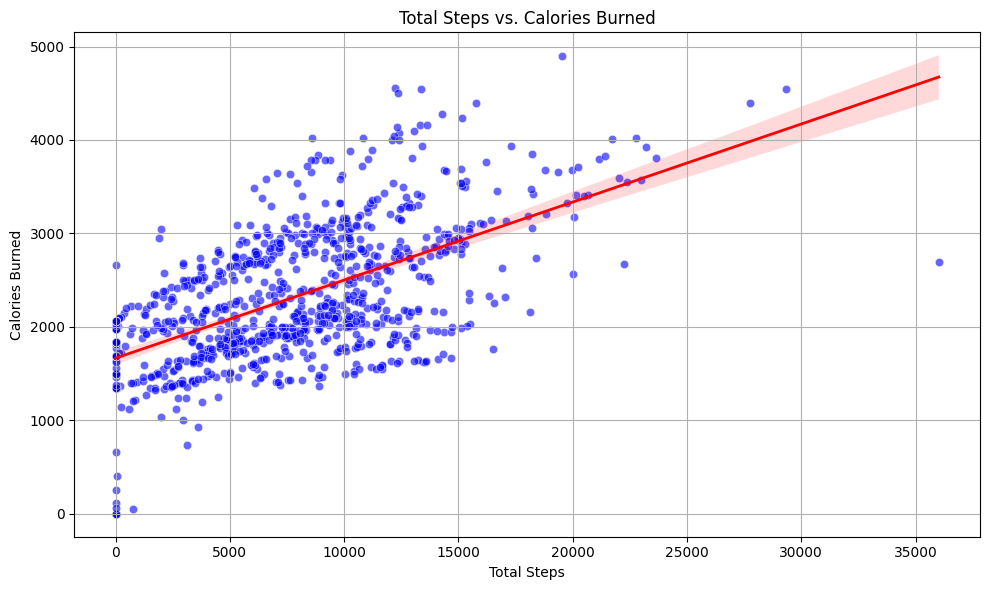

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='TotalSteps', y='Calories', color='blue', alpha=0.6)
sns.regplot(data=df, x='TotalSteps', y='Calories', scatter=False, color='red', line_kws={"linewidth":2})

plt.title('Total Steps vs. Calories Burned')
plt.xlabel('Total Steps')
plt.ylabel('Calories Burned')
plt.grid(True)
plt.tight_layout()
plt.show()


In [38]:
correlation = df['TotalSteps'].corr(df['Calories'])
print(f"Correlation between Steps and Calories: {correlation:.2f}")


Correlation between Steps and Calories: 0.59


### 2. Sleep Duration Distribution and Quality Analysis (Histogram, Scatter plot)

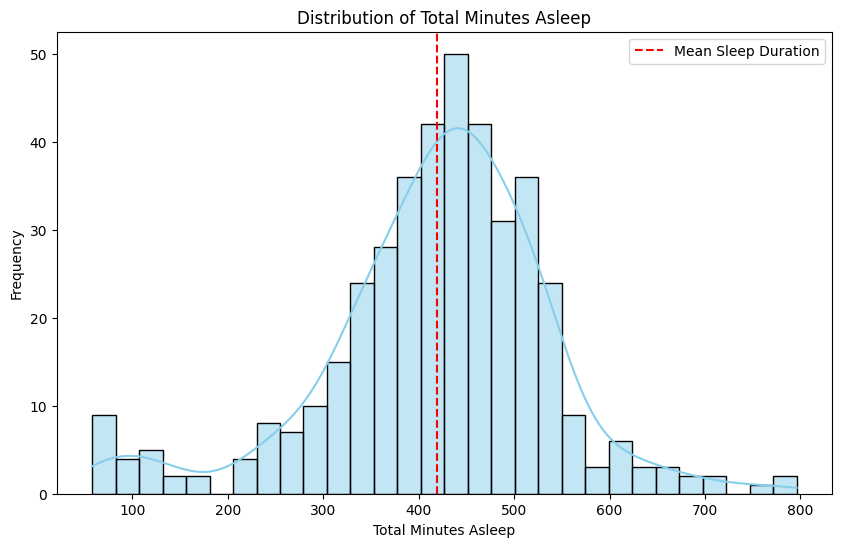

In [39]:
# 1. Histogram for Total Minutes Asleep
plt.figure(figsize=(10, 6))
sns.histplot(df_sleep['TotalMinutesAsleep'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Minutes Asleep')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Frequency')
plt.axvline(df_sleep['TotalMinutesAsleep'].mean(), color='red', linestyle='--', label='Mean Sleep Duration')
plt.legend()
plt.show()

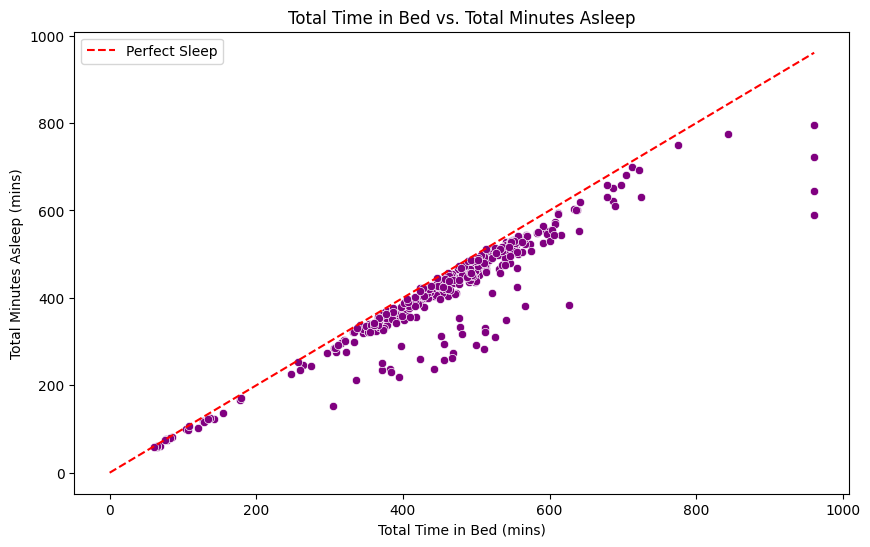

In [40]:
# 2. Scatter plot: Total Time in Bed vs Total Minutes Asleep
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sleep, x='TotalTimeInBed', y='TotalMinutesAsleep', color='purple')
plt.title('Total Time in Bed vs. Total Minutes Asleep')
plt.xlabel('Total Time in Bed (mins)')
plt.ylabel('Total Minutes Asleep (mins)')
plt.plot([0, df_sleep['TotalTimeInBed'].max()], [0, df_sleep['TotalTimeInBed'].max()], color='red', linestyle='--', label='Perfect Sleep')
plt.legend()
plt.show()

### 3) Activity Intensity Breakdown: Minutes and Distance (Bar plot)

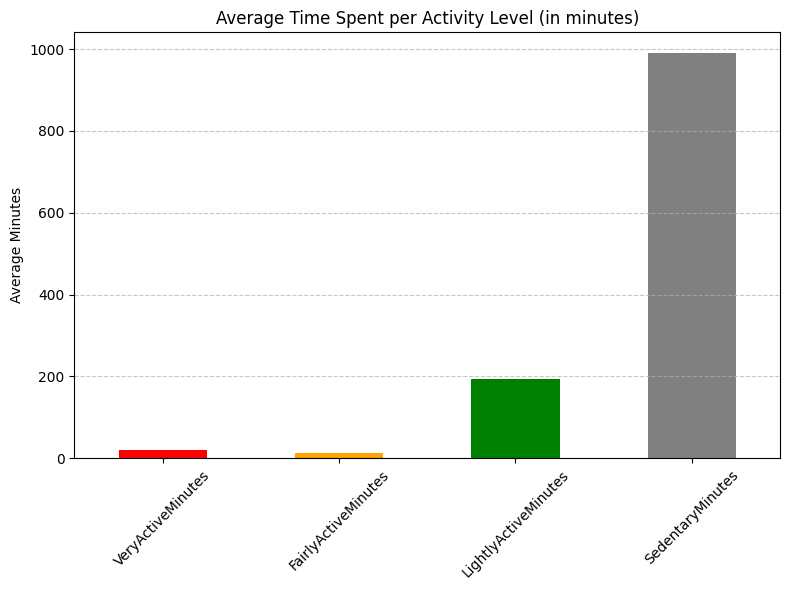

In [41]:

# Calculate average activity minutes
activity_minutes = df[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].mean()

# Plot
plt.figure(figsize=(8, 6))
activity_minutes.plot(kind='bar', color=['red', 'orange', 'green', 'grey'])
plt.title("Average Time Spent per Activity Level (in minutes)")
plt.ylabel("Average Minutes")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


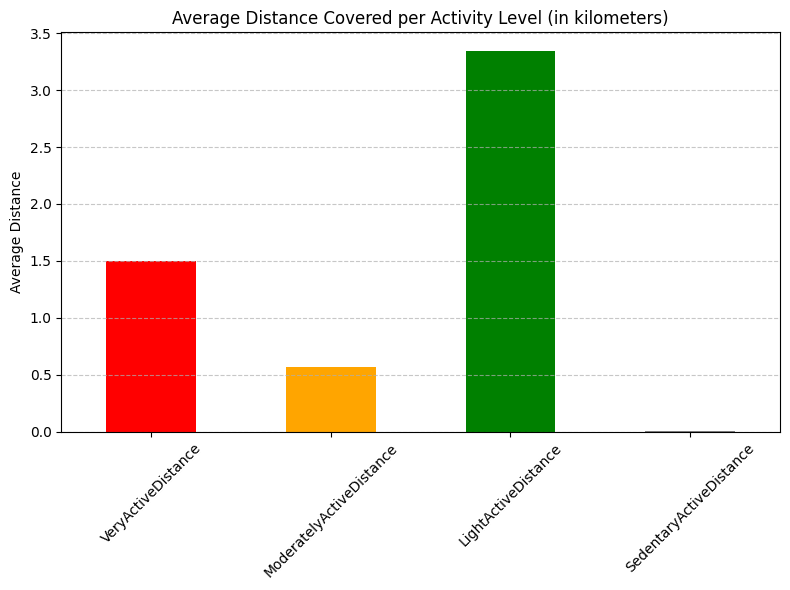

In [42]:
# Calculate average distance
activity_distance = df[['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance']].mean()

# Plot
plt.figure(figsize=(8, 6))
activity_distance.plot(kind='bar', color=['red', 'orange', 'green', 'grey'])
plt.title("Average Distance Covered per Activity Level (in kilometers)")
plt.ylabel("Average Distance")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 4: Hourly Activity Intensity vs. Heart Rate (Heatmap)

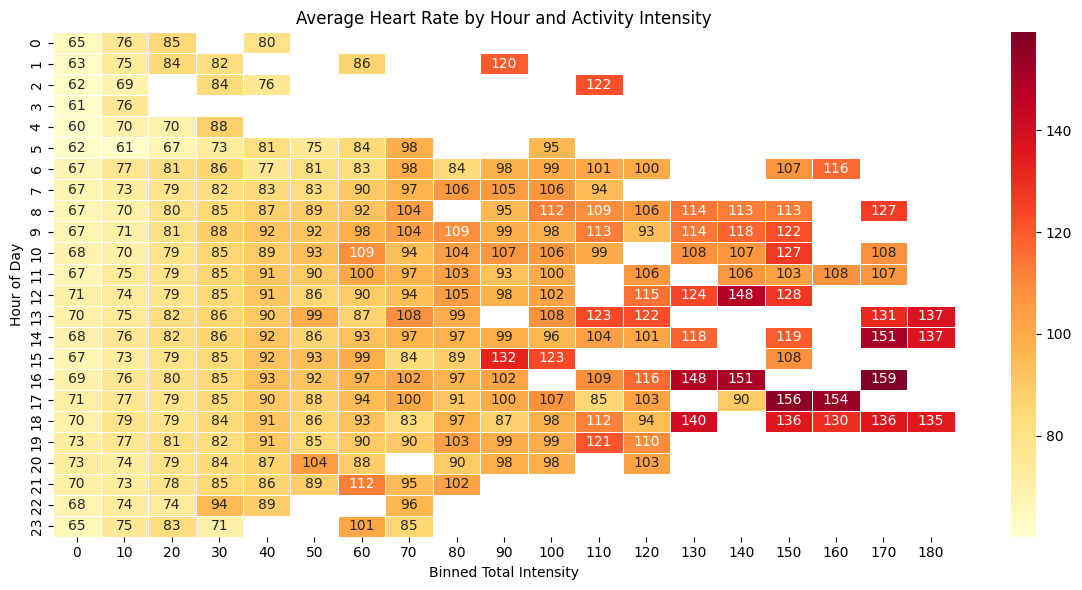

In [43]:
hr['IntensityBin'] = (hr['TotalIntensity'] // 10) * 10
pivot_table = hr.pivot_table(
    index='Hour',
    columns='IntensityBin',
    values='AvgHeartRate',
    aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Average Heart Rate by Hour and Activity Intensity')
plt.xlabel('Binned Total Intensity')
plt.ylabel('Hour of Day')
plt.tight_layout()
plt.show()

### 5) Hourly Distribution of Average Heart Rate (Box plot)

C:\Users\HP\AppData\Local\Temp\ipykernel_16856\1185566310.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hr, x='Hour', y='AvgHeartRate', palette='Set2')


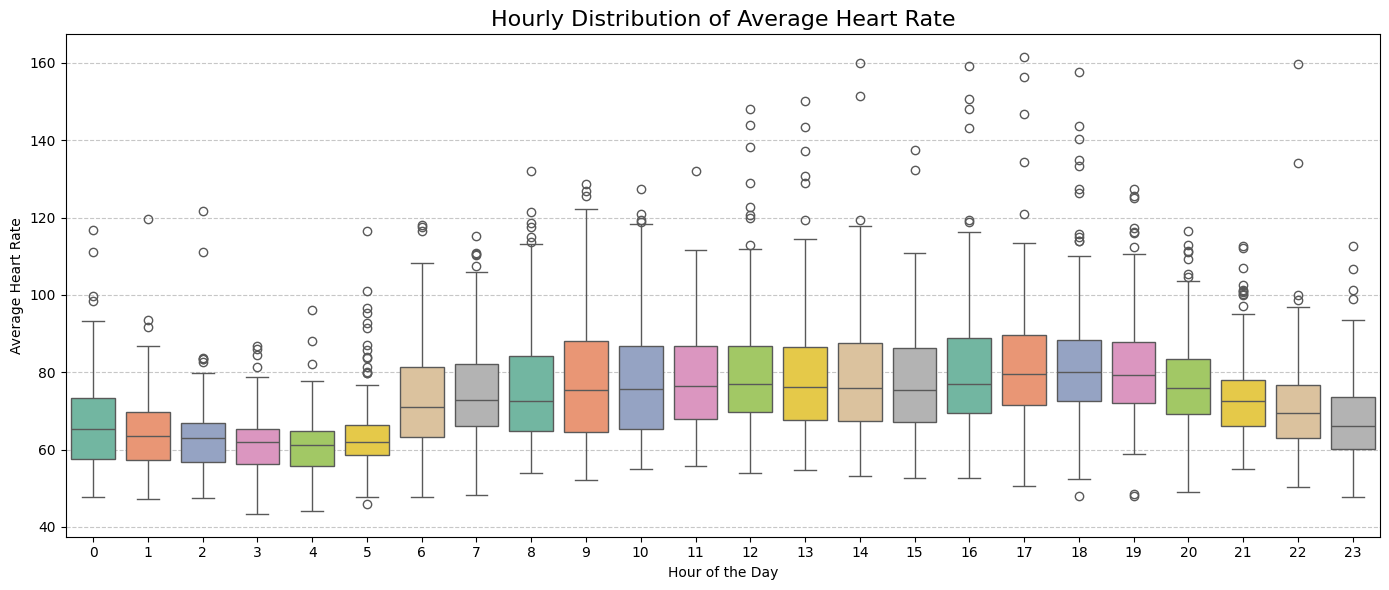

In [44]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=hr, x='Hour', y='AvgHeartRate', palette='Set2')
plt.title('Hourly Distribution of Average Heart Rate', fontsize=16)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Heart Rate')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 6) Total Intensity vs Average Heart Rate (Scatter plot)

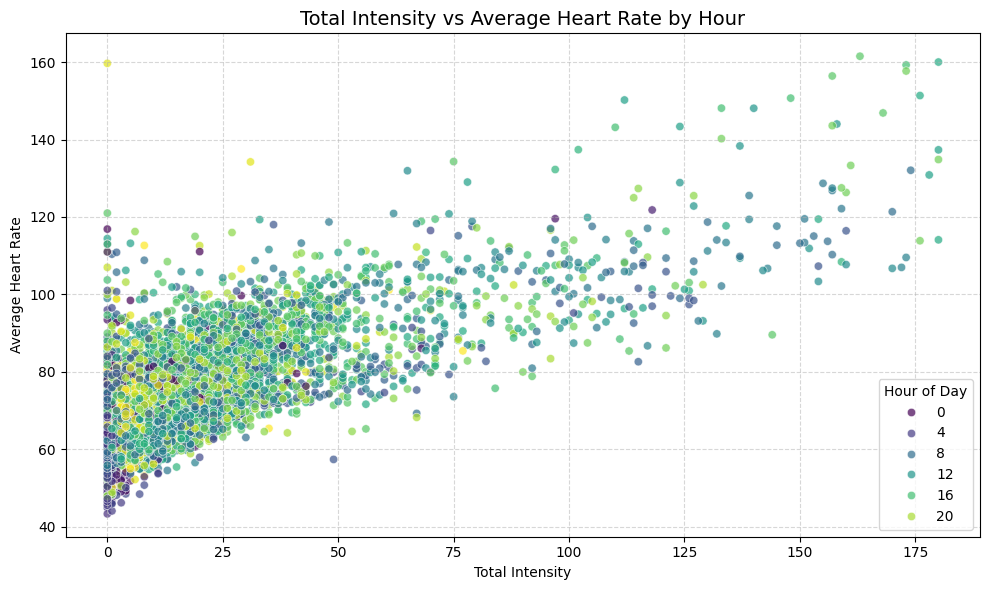

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=hr, x='TotalIntensity', y='AvgHeartRate', hue='Hour', palette='viridis', alpha=0.7)
plt.title('Total Intensity vs Average Heart Rate by Hour', fontsize=14)
plt.xlabel('Total Intensity')
plt.ylabel('Average Heart Rate')
plt.legend(title='Hour of Day')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 7) Hours of Day vs Average Steps (Line plot)

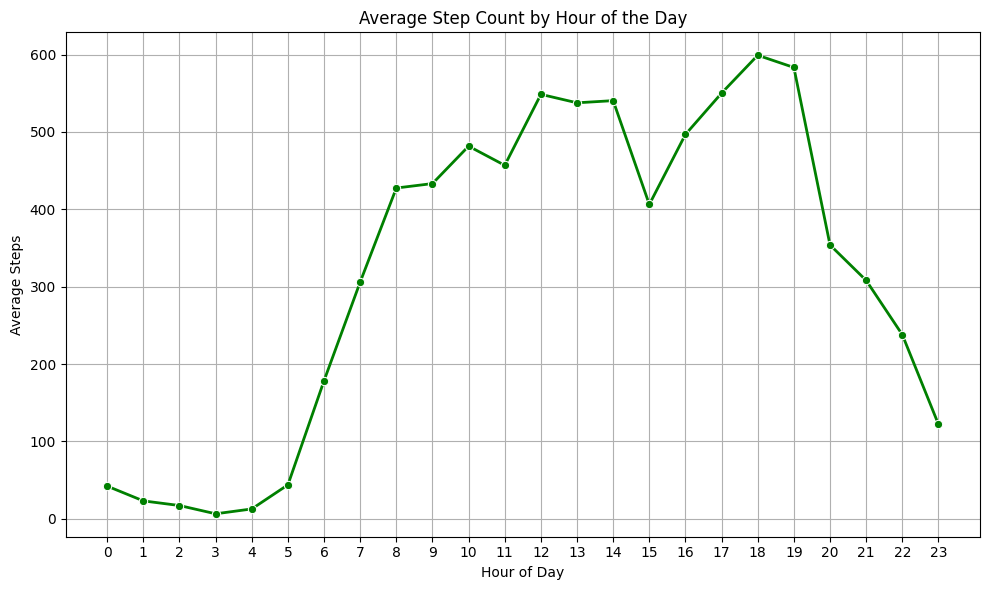

In [46]:
# Grouping by Hour and calculate average steps
steps_by_hour = hourly_merged.groupby('Hour')['StepTotal'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=steps_by_hour, x='Hour', y='StepTotal', marker='o', linewidth=2, color='green')
plt.title('Average Step Count by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Steps')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

### 8) Average hourly steps on weekdays vs weekends. (Line plot)

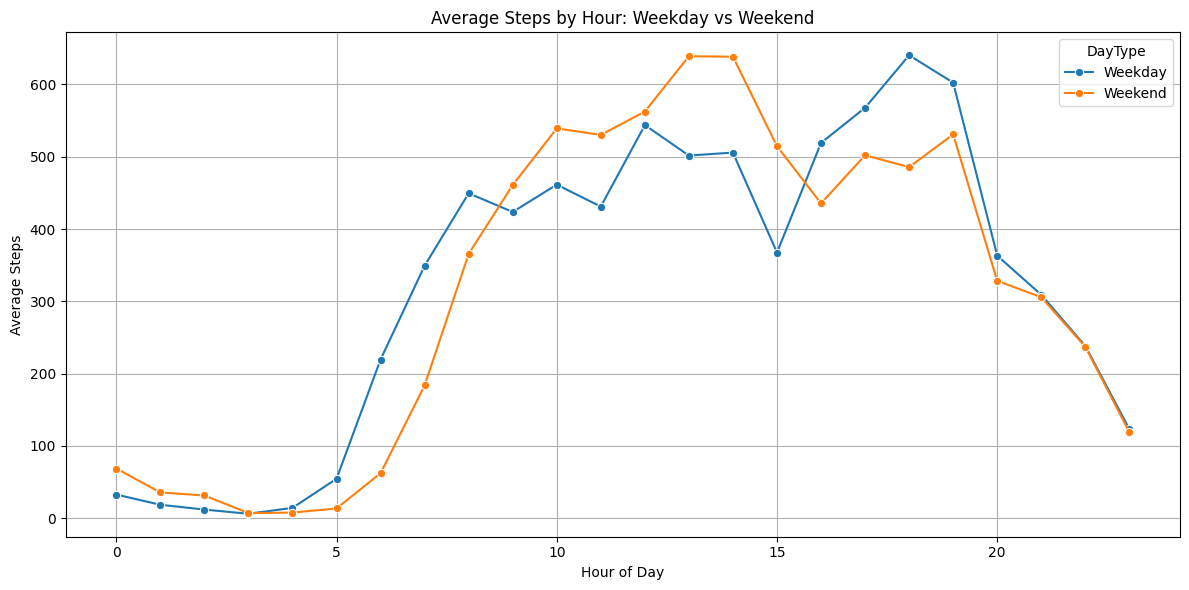

In [47]:
# Adding weekday column
hourly_merged['DayOfWeek'] = hourly_merged['Date'].dt.dayofweek

# Defining weekday/weekend
hourly_merged['DayType'] = hourly_merged['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Grouping by Hour and DayType
avg_steps = hourly_merged.groupby(['Hour', 'DayType'])['StepTotal'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_steps, x='Hour', y='StepTotal', hue='DayType', marker='o')
plt.title('Average Steps by Hour: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Average Steps')
plt.grid(True)
plt.tight_layout()
plt.show()


### 9) Daily Activity Minutes Distribution (Pie chart)

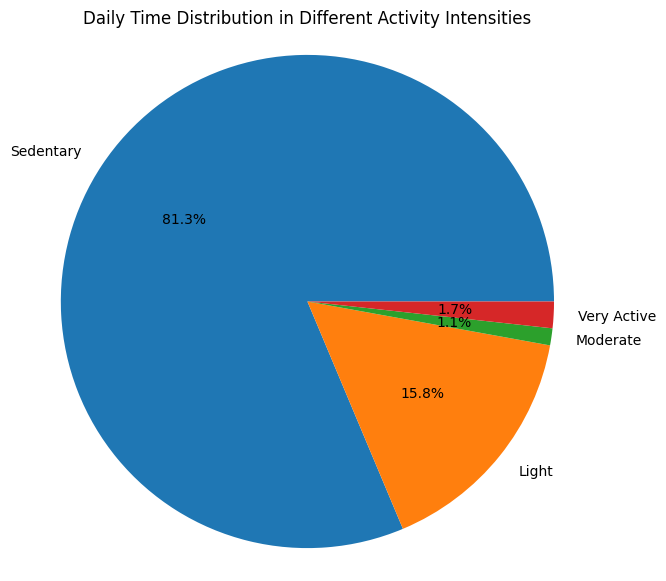

In [48]:
activity_minutes = {
    'Sedentary': df['SedentaryMinutes'].sum(),
    'Light': df['LightlyActiveMinutes'].sum(),
    'Moderate': df['FairlyActiveMinutes'].sum(),
    'Very Active': df['VeryActiveMinutes'].sum()
}

plt.figure(figsize=(7, 7))
plt.pie(activity_minutes.values(), labels=activity_minutes.keys(), autopct='%1.1f%%')
plt.title('Daily Time Distribution in Different Activity Intensities')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### 10) Calorie Burn Patterns by Hour of the Day (Line plot)

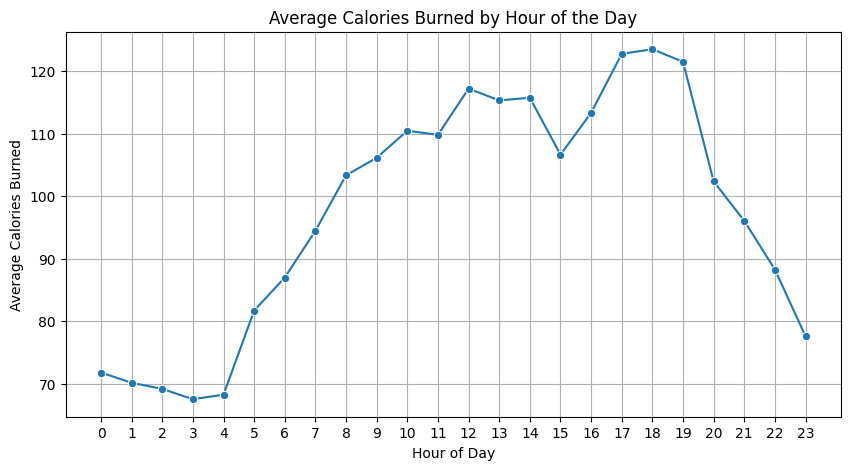

In [49]:
avg_calories_by_hour = hourly_merged.groupby('Hour')['Calories'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_calories_by_hour.index, y=avg_calories_by_hour.values, marker='o')
plt.title('Average Calories Burned by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Calories Burned')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

In [50]:
df.to_excel("DailyActivity.xlsx", index=False)
df_sleep.to_excel('SleepData.xlsx', index=False)
hourly_merged.to_excel('HourlyActivity.xlsx', index=False)
hr.to_excel('HeartRateHourly.xlsx', index=False)


In [51]:
hourly_merged

,Id,StepTotal,Date,Hour,Calories,TotalIntensity,AverageIntensity,AvgHeartRate,DayOfWeek,DayType
0,1503960366,373,2016-04-12,0,81,20,0.333333,NaN,1,Weekday
1,1503960366,160,2016-04-12,1,61,8,0.133333,NaN,1,Weekday
2,1503960366,151,2016-04-12,2,59,7,0.116667,NaN,1,Weekday
3,1503960366,0,2016-04-12,3,47,0,0.000000,NaN,1,Weekday
4,1503960366,0,2016-04-12,4,48,0,0.000000,NaN,1,Weekday
...,...,...,...,...,...,...,...,...,...,...
22094,8877689391,514,2016-05-12,10,126,12,0.200000,68.733503,3,Weekday
22095,8877689391,1407,2016-05-12,11,192,29,0.483333,72.030108,3,Weekday
22096,8877689391,3135,2016-05-12,12,321,93,1.550000,87.614719,3,Weekday
22097,8877689391,307,2016-05-12,13,101,6,0.100000,64.737705,3,Weekday
